# linear Regression with scikit learn
the following topics are covered:
1. a typical problem statement for machine learning.
2. downloading and exploring a dataset for machine learning.
3. linear regression with one variable using scikit-learn
4. linear regression with multiple variables
5. using categorical features for machine learning
6. regression coefficients and feature importance
7. other models and techniques for regression using scikit-learn
8. applying linear regression to other datasets


## Problem Statement

This tutorial takes a practical and coding-focused. We'll define the terms machine learning and linear regression in the context of a problem, and later generalize their definitions. We'll work through a typical machine learning problem step-by-step:

### QUESTION: ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, you're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.

### DOWNLOADING THE DATA

In [3]:
medical_charges_url='https://raw.githubusercontent.com/JovianHQ/opendatasets/master/data/medical-charges.csv'

In [4]:
from urllib.request import urlretrieve

In [5]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7c24971e8410>)

In [6]:
import pandas as pd

In [7]:
medical_df = pd.read_csv('medical.csv')
display(medical_df)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Exploratory analysis and visualization:

In [10]:
!pip install plotly matplotlib seaborn --quiet

In [11]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']='#00000000'

AGE:
age is a numeric column . the minimum age in the dataset is 18 and the maximum age is 64. thus, we can visualize the distribution of age using a histogram with 47 bins(one for each year) and a box plot.


In [14]:
medical_df.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [15]:
fig= px.histogram(medical_df,
                  x='age',
                  marginal='box',
                  nbins=47,
                  title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

### body mass index
distribution of bmi customers using histogram and box plot

In [16]:
fig= px.histogram(medical_df,
                  x='bmi',
                  marginal='box',
                  color_discrete_sequence=['red'],
                  title='distribution of bmi')
fig.update_layout(bargap=0.1)
fig.show()

### charges
visualizing charges i.e. the annual medical charges for customers. this is the column we're trying to predict. lets also use the categorical column "smoker" to distinguish the charges for smokers and non smokers.

In [17]:
fig= px.histogram(medical_df,
                  x='charges',
                  marginal='box',
                  color='smoker',
                  color_discrete_sequence=['green','grey'],
                  title='annual medical charges')
fig.update_layout(bargap=0.1)
fig.show()

### smoker
lets visualize the distribution of the smoker column using a histogram.

In [18]:
medical_df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [19]:
px.histogram(medical_df,x='smoker',color='sex',title='smoker')

### age and charges:
lets visualize the relationship between "age" and "charges" using a scatte plot. each point in the scatter plot represents one customer . we'll also use values in the "smoker" column to color the points

In [20]:
fig= px.scatter(medical_df,
                x='age',
                y='charges',
                color='smoker',
                opacity=0.8,
                hover_data=['sex'],
                title='age vs charges')
fig.update_traces(marker_size=5)
fig.show()

we can see three "clusters" of points, each of which seems to form a line with an increasing slope:
1. the first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others.
2. the second cluster contains a mix of smokers and non-smokers. its possible that these are actually 2 distinct but overlapping clusters." non-smokers with medical issues" and "smokers without major medical issues".
3. the final cluster consists exclusively of smokers, presumably smookers with major medical issues that are possibly related to or worsened by smoking.

## bmi and charges:


In [21]:
fig= px.scatter(medical_df,
                x='bmi',
                y='charges',
                color='smoker',
                opacity=0.8,
                hover_data=['sex'],
                title='bmi vs charges')
fig.update_traces(marker_size=5)
fig.show()

it appears that for non smokers an increase in bmi doesnt seem to be related to an increase in medical charges. however medical charges seem to be significantly higher for smoke with a bmi greater than 30.

some  graphs to visualize how the "charges" column is related to other columns("children","sex","region" and "smoker").summarize the insights gathered from these graphs.


In [22]:
px.violin(medical_df, x='children',y='charges')

### correlation
as you can tell from the analysis the values in "charges" compared to other columns. eg- "age" and "charges" seems to grow together, whereas "bmi" and "charges" dont.
 the relationship is often expressed numerically using a measure called the CORRELATION COEFFICIENT, which can be computed using .corr method of a pandas series

In [23]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306476)

In [24]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362895)

In [25]:
medical_df.charges.corr(medical_df.children)

np.float64(0.06799822684790478)

In [26]:
smoker_values= {'no':0, 'yes':1}
smoker_numeric= medical_df.smoker.map(smoker_values)
smoker_numeric

,smoker
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,0
1335,0
1336,0


In [27]:
medical_df.charges.corr(smoker_numeric)

np.float64(0.787251430498478)

In [28]:
px.scatter(medical_df,x='age',y='age')

In [29]:
medical_df.select_dtypes(include=['number']).corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


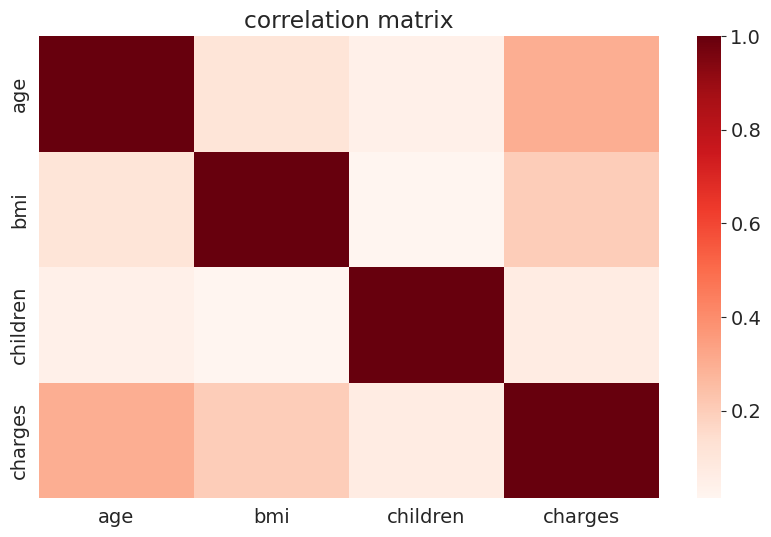

In [30]:
sns.heatmap(medical_df.drop('smoker', axis=1).select_dtypes(include=['number']).corr(),cmap='Reds')
plt.title('correlation matrix');

## LINEAR REGRESSION using a single feature
we know that the "smoker" and "age" columns have the strongest correlation with "charges". lets try to find a way of estimating the values of "charges" using the values of "age" for non-smokers.

In [31]:
non_smoker_df= medical_df[medical_df.smoker=='no']

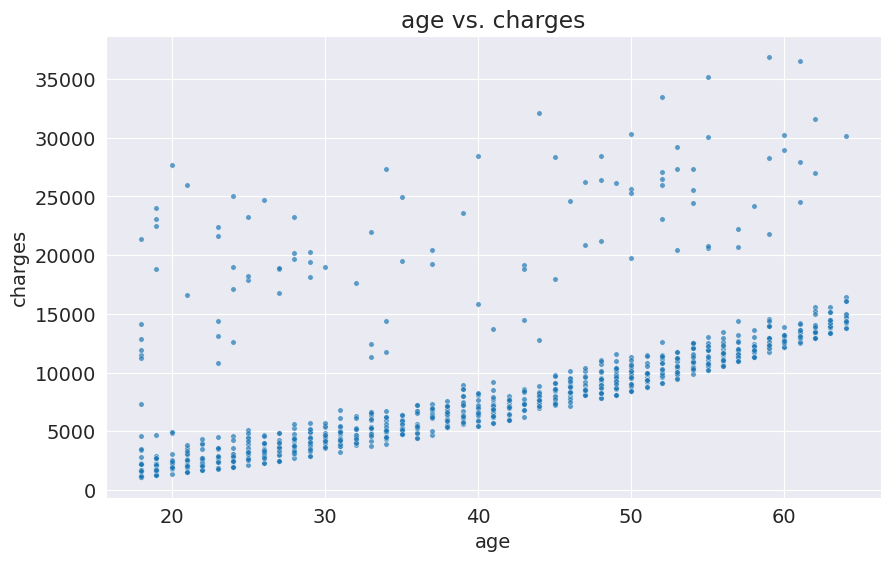

In [32]:
plt.title('age vs. charges')
sns.scatterplot(data=non_smoker_df,x='age',y='charges',alpha=0.7,s=15);

apart from a few exceptions the points seen to form a line. we'll try and "fit" a line using this points, and use the line to predict changes for a given age. a line on the X&Y coordinates has the following formula:

Y=wx+b

the line is characterized two numbers: w(called "slope") and b(called"intercept").



# **Model**

In the above case, the x axis shows “age” and the y axis shows “charges”. Thus, we’re assume the following relationship between the two:

**charges = w × age + b**

We’ll try determine *w* and *b* for the line that best fits the data.

* This technique is called **linear regression**, and we call the above equation a **linear regression model**, because it models the relationship between “age” and “charges” as a straight line.
* The numbers *w* and *b* are called the **parameters** or **weights** of the model.
* The values in the “age” column of the dataset are called the **inputs** to the model and the values in the charges column are called **targets**.

Let define a helper function **estimate_charges**, to compute *charges*, given *age*, *w* and *b*.


In [33]:
def estimate_charges(age,w,b):
  return w*age+b


In [34]:
w=50
b=100

In [35]:
estimate_charges(40,w,b)

2100

In [36]:
ages= non_smoker_df.age
ages

,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


In [37]:
estimated_charges_series = estimate_charges(ages,w,b)
estimated_charges_series

,age
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
1332,2700
1333,2600
1334,1000
1335,1000


In [38]:
non_smoker_df.charges


,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


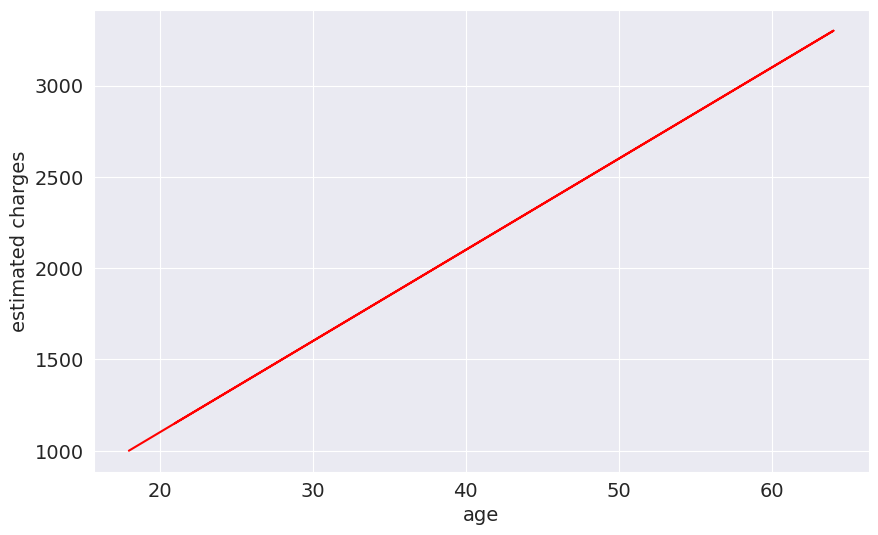

In [39]:
plt.plot(ages, estimated_charges_series, 'r-');
plt.xlabel('age')
plt.ylabel('estimated charges');

as expected the points lie on a straight line.
we can overlay this line on the actual data, so see how well our model fits the data

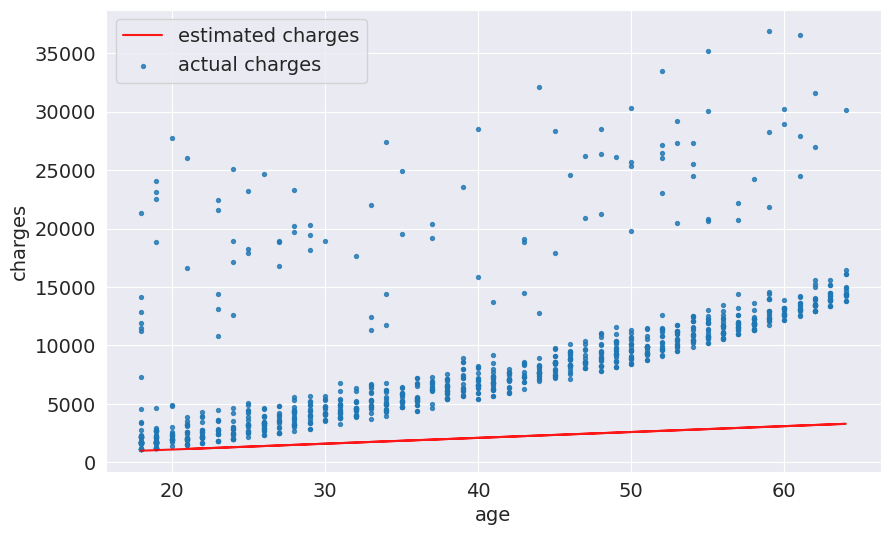

In [40]:
target = non_smoker_df.charges
plt.plot(ages, estimated_charges_series, 'r-',alpha=0.9);
plt.scatter(ages,target,alpha=0.8,s=8);
plt.xlabel('age');
plt.ylabel('charges');
plt.legend(['estimated charges','actual charges']);

clearly our estimates are quite poor, and the line does not  "fit" the data. however, we can try different values of w and b to move the line around.


In [41]:
def try_parameters(w,b):
  ages= non_smoker_df.age
  target= non_smoker_df.charges

  estimated_charges_series = estimate_charges(ages,w,b)

  plt.plot(ages, estimated_charges_series, 'r-',alpha=0.9);
  plt.scatter(ages,target,alpha=0.8,s=8);
  plt.xlabel('age')
  plt.ylabel('charges')
  plt.legend(['estimated charges','actual charges'])

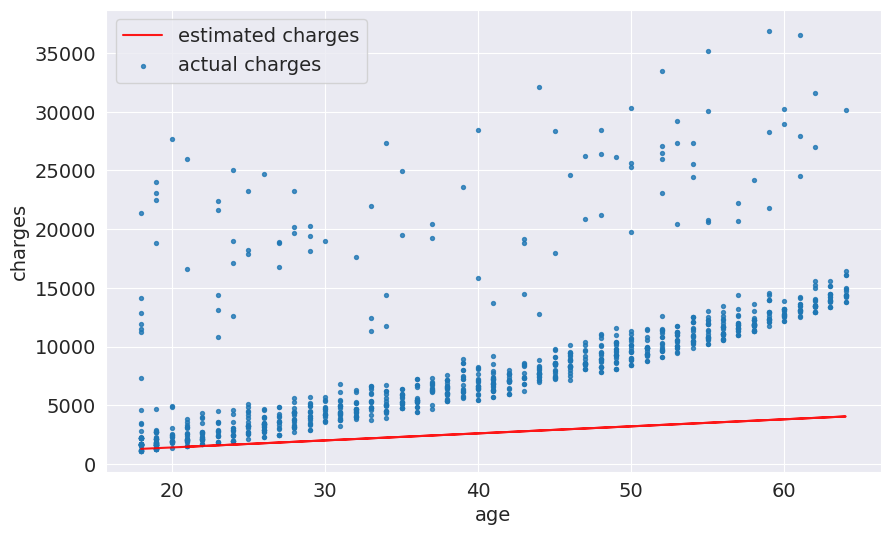

In [42]:
try_parameters(60,200)

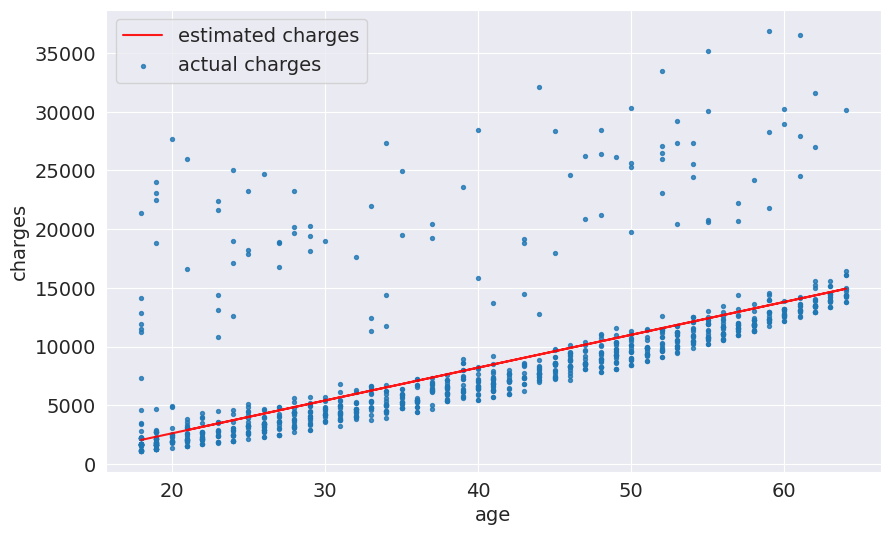

In [43]:
try_parameters(280,-3000)

As we change the values, of w and b manually, trying to move the line visually closer to the points, we are learning the approximate relationship between "age" and "charges".

Wouldn't it be nice if a computer could try several different values of w and b and learn the relationship between "age" and "charges"? To do this, we need to solve a couple of problems:

We need a way to measure numerically how well the line fits the points.

Once the "measure of fit" has been computed, we need a way to modify w and b to improve the fit.

If we can solve the above problems, it should be possible for a computer to determine w and b for the best fit line, starting from a random guess.


In [44]:
targets = non_smoker_df.charges
targets

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [47]:
predictions = estimated_charges_series
predictions

,age
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
1332,2700
1333,2600
1334,1000
1335,1000


Loss/Cost Function

We can compare our model's predictions with the actual targets using the following method:

Calculate the difference between the targets and predictions (the difference is called the "residual").

Square all elements of the difference matrix to remove negative values.

Calculate the average of the elements in the result.

Take the square root of the result.

The result is a single number, known as the root mean squared error (RMSE).
The above description can be stated mathematically as follows:

RMSE = sqrt( (Σ (Predicted_i - Actual_i)^2) / N )



	​


In [48]:
!pip install numpy --quiet

In [49]:
import numpy as np

In [50]:
def rmse(targets, predictions):
  return np.sqrt(np.mean(np.square(targets-predictions)))

In [52]:
w=50
b=100

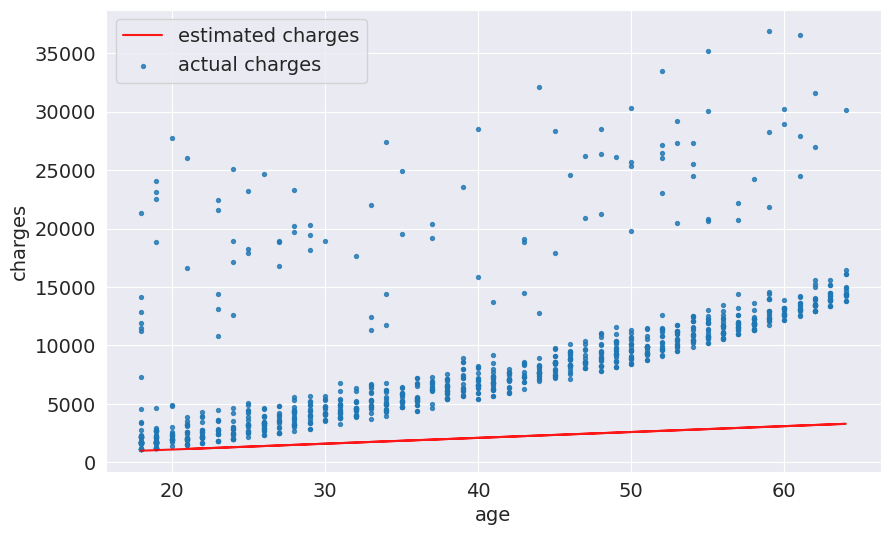

In [53]:
try_parameters(w,b)

In [57]:
targets= non_smoker_df['charges']
predicted= estimate_charges(non_smoker_df.age ,w,b)

In [58]:
rmse(targets, predicted)

np.float64(8461.949562575493)

the result is called loss beacuse it indicates how bad the model is at predicting the target variables. it represents information loss in the model. the lower the loss the better the model

lets modify the try_parameters function to also display the loss.

In [59]:
def try_parameters(w,b):
  ages= non_smoker_df.age
  target- non_smoker_df.charges
  predictions= estimate_charges(ages,w,b)

  plt.plot(ages, predictions,'r',alpha=0.9);
  plt.scatter(ages, target, s=8, alpha=0.8);
  plt.xlabel('age');
  plt.ylabel('charges');
  plt.legend('prediction','actual');

  loss=rmse(target,predictions)
  print("rmse loss:",loss)

rmse loss: 4665.963874569783


/tmp/ipython-input-3336685487.py:10: UserWarning:

Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries



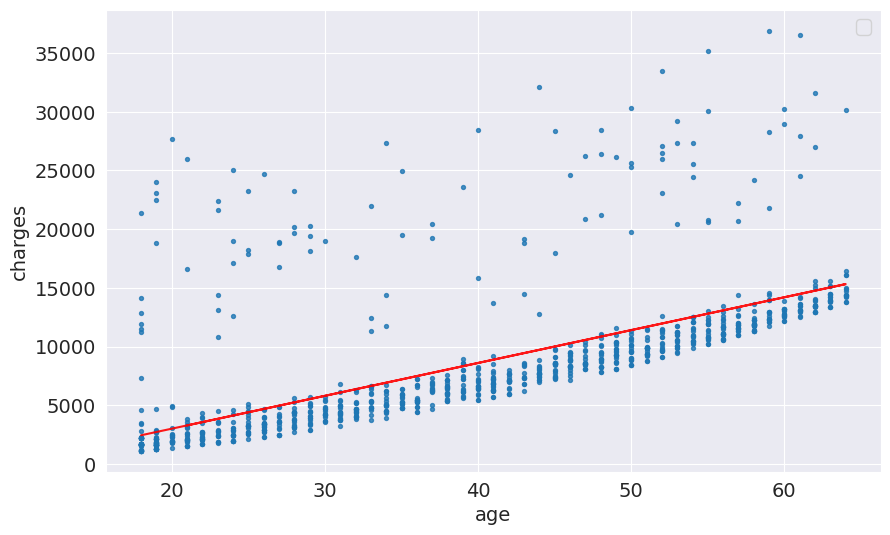

In [76]:
try_parameters(280,-2600)

/tmp/ipython-input-3336685487.py:10: UserWarning:

Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries



rmse loss: 4662.516524487403


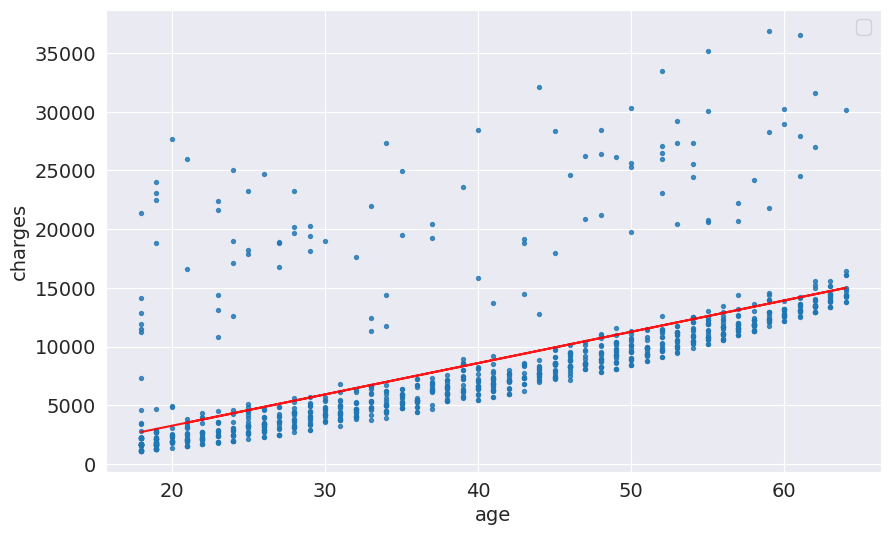

In [92]:
try_parameters(267,-2091)

Optimizer

Next, we need a strategy to modify weights w and b to reduce the loss and improve the “fit” of the line to the data.

Ordinary Least Squares: https://www.youtube.com/watch?v=szXbuO3bVFk
 (better for smaller datasets)

Stochastic Gradient Descent: https://www.youtube.com/watch?v=sDv4f4s2S8s8
 (better for larger datasets)

Both of these have the same objective: to minimize the loss. However, while ordinary least squares directly computes the best values for w and b using matrix operations, gradient descent uses an iterative approach — starting with random values of w and b and slowly improving them using derivatives.

# linear Regressionn using scikit-learn
 in practice, you'll never need to implement eithe of the above methods yourself. you can use a library like scikit-learn to do this for you.

In [77]:
!pip install scikit-learn --quiet

lets use the Linear Regression class from the scikit-learn to find out the best fit line for 'age' vs 'charges' using the ordinary least square optimization technique.

In [78]:
from sklearn.linear_model import LinearRegression

first we  create a new model object.

In [79]:
model= LinearRegression()

next, we can use the fit method of the model tpo find the best fit line for the inputs and targets. not that the input  x must be 2d array, so we'll need to pass a dataframe, instead of a single column. and fit the  model to the data. then we can make predictions using the model

In [80]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [81]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('input.shape:',inputs.shape)
print('targets.shape:',targets.shape)

input.shape: (1064, 1)
targets.shape: (1064,)


In [82]:
model.fit(inputs,targets)

LinearRegression()

In [84]:
model.predict(np.array([[23],
                       [37],
                       [61]]))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

do these values seem reasonable?compare them with the scatter plot.
lets compute the predictions for the entire set of inputs


In [85]:
predictions= model.predict(inputs)


In [86]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [88]:
targets

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [89]:
rmse(targets,predictions)

np.float64(4662.505766636395)

seems like our prediction is off by $4000 on average, which is not too bad considering the fact that there are several outliers.
the parameters of the model are stored in the coef_ and intercept_ properties.


In [90]:
#w
model.coef_

array([267.24891283])

In [91]:
#b
model.intercept_

np.float64(-2091.4205565650864)

/tmp/ipython-input-3336685487.py:10: UserWarning:

Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries



rmse loss: 4662.505766636395


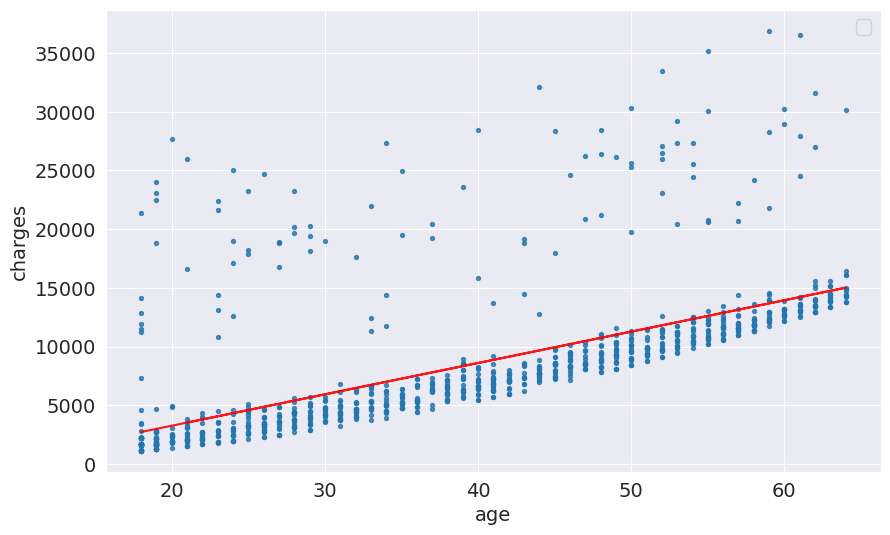

In [93]:
try_parameters(model.coef_,model.intercept_)

## EXERCISE:
use the SGDRegrerssor class form scikit-learn to train a model using the stochastic gradient descent technique. make predictions and compute the loss. do you see any difference?

also

repeat the steps in other sections to train a linear regresiion model to estimate medical charges for smoker. visualize the targets and predictions and compute the loss.

# MACHINE LEARNING
it is the process of computing the best parameters to model the relationship between some features and targets.
every machine learning problem has three components:
1. MODEL
2. COST FUNCTION
3. OPTIMIZATION

[INPUT]
Training data including target outputs

       ↓

[MODEL]
Processes input to generate predictions

      ↓
[OUTPUT]
Prediction calculated by model

      ↓
Compare with:
[TARGET OUTPUT]
Actual expected output

      ↓
[ERROR / LOSS FUNCTION]
Calculates difference between prediction and target

      ↓
[OPTIMIZATION METHOD]
Adjusts model parameters to reduce error

      ↺
Loop back to MODEL for improved predictions.





In [95]:
#create inputs and targets
inputs,targets= non_smoker_df[['age']],non_smoker_df['charges']

#create and train the model
model= LinearRegression().fit(inputs,targets)

#generate predictions
predictions= model.predict(inputs)

#compute loss to evaluate the model
loss= rmse(targets, predictions)
print('loss:',loss)

loss: 4662.505766636395


##linear Regression using multiple features
so far,we've used on the age feature to estimate charges. adding another feature like bmi is fairly straighforward. we simply assume the relationship:

charges=w1 X age + w2 X bmi +b

we need to change just one line  of code to include the bmi.


In [96]:
#create inputs and targets
inputs,targets= non_smoker_df[['age','bmi']],non_smoker_df['charges']

#create and train the model
model= LinearRegression().fit(inputs,targets)

#generate predictions
predictions= model.predict(inputs)

#compute loss to evaluate the model
loss= rmse(targets, predictions)
print('loss:',loss)

loss: 4662.3128354612945


adding bmi doesnt seem to reduce the loss by much as the bmi has very weak correaltion with charges, especially for non_smoker.
lets try with a thord variable


In [97]:
inputs,targets= non_smoker_df[['age','bmi','children']],non_smoker_df['charges']

model= LinearRegression().fit(inputs,targets)

predictions= model.predict(inputs)

loss= rmse(targets, predictions)
print('loss:',loss)

loss: 4608.470405038247


now what if we apply the model to whole dataset and not just non_smoker


In [99]:
inputs,targets= medical_df[['age','bmi','children']],medical_df['charges']

model= LinearRegression().fit(inputs,targets)

predictions= model.predict(inputs)

loss= rmse(targets, predictions)
print('loss:',loss)

loss: 11355.317901125973


In [100]:
px.scatter(medical_df,x='age',y='charges',color='smoker')

###Using Categorical Features for Machine Learning

So far we've been using only numeric columns, since we can only perform computations with numbers. If we could use categorical columns like "smoker", we can train a single model on the entire dataset.

To use the categorical columns, we simply need to convert them to numbers. There are three techniques for doing this:

1. If a categorical column has just two categories (it's called a binary category), then we can replace their values with 0 and 1.

2. If a categorical column has more than 2 categories, we can perform one-hot encoding, i.e. create a new column for each category with 1s and 0s.

3. If the categories have a natural order (e.g. cold, neutral, warm, hot), then they can be converted to numbers (e.g. 1, 2, 3, 4) preserving the order. These are also called ordinal categories.

## Binary Categories
the 'smoker' category has just 2 values 'yes' and 'no'. lets create a new column 'smoker_code' containing only 0's and 1's

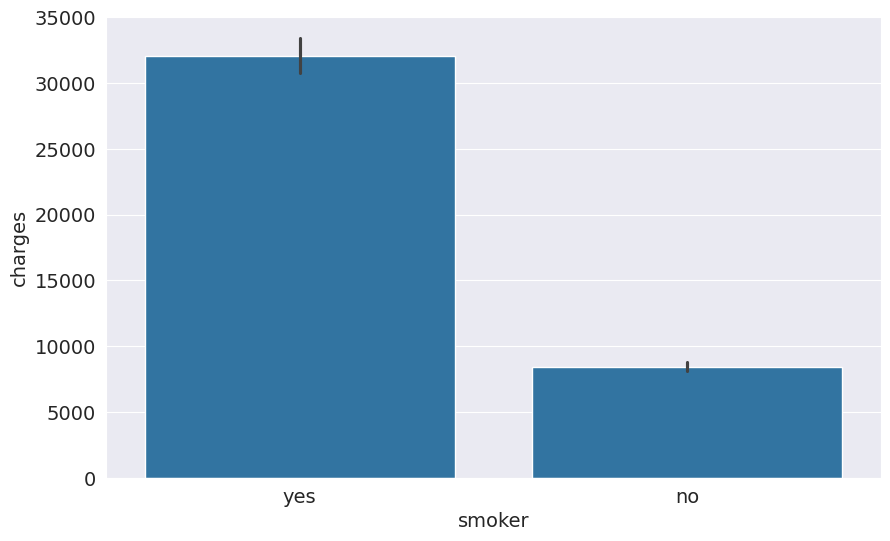

In [101]:
sns.barplot(data= medical_df,x='smoker',y='charges');

In [102]:
smoker_codes= {'no':0,'yes':1}
medical_df['smoker_code']= medical_df.smoker.map(smoker_codes)

In [103]:
medical_df.charges.corr(medical_df.smoker_code)

np.float64(0.787251430498478)

In [104]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


we can now change the smoker_code column for linear regression

charges= w1 X age + w2 X bmi + w3 X charges + w4 X smoker +b

In [105]:
inputs,targets= medical_df[['age','bmi','children','smoker_code']],medical_df['charges']

model= LinearRegression().fit(inputs,targets)

predictions= model.predict(inputs)

loss= rmse(targets, predictions)
print('loss:',loss)

loss: 6056.439217188081


the loss reduced from 11355 to 6056, almost by 50%! this is important lesson, never ignore categorical data.
lets try adding 'sex' column as well


<Axes: xlabel='sex', ylabel='charges'>

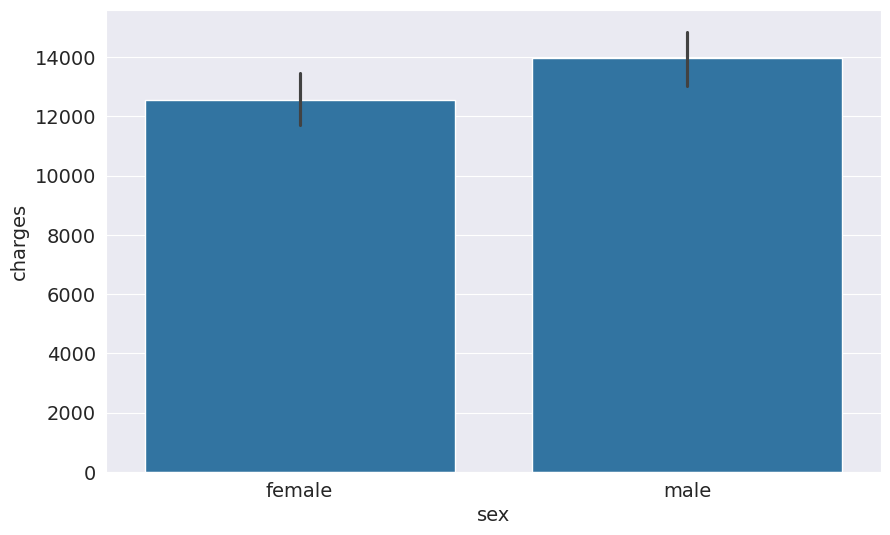

In [106]:
sns.barplot(data=medical_df, x='sex', y='charges')

In [107]:
sex_codes= {'female':0,'male':1}
medical_df['sex_code']= medical_df.sex.map(sex_codes)

In [110]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [108]:
medical_df.charges.corr(medical_df.sex_code)

np.float64(0.057292062202025484)

In [111]:
inputs,targets= medical_df[['age','bmi','children','smoker_code','sex_code']],medical_df['charges']

model= LinearRegression().fit(inputs,targets)

predictions= model.predict(inputs)

loss= rmse(targets, predictions)
print('loss:',loss)

loss: 6056.100708754546


## One-hot Encoding
the region column contains 4 values, so we'll need to use hot encoding and create a new column for each region

<Axes: xlabel='region', ylabel='charges'>

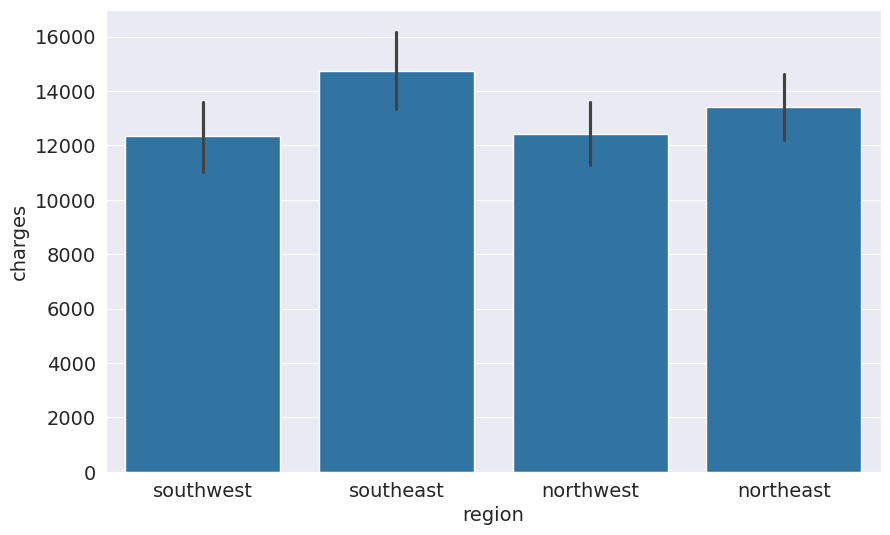

In [113]:
sns.barplot(data=medical_df,x='region',y='charges')

In [114]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [116]:
enc.transform([['northeast'],
               ['northwest']]).toarray()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



array([[1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [117]:
One_hot = enc.transform(medical_df[['region']]).toarray()
One_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [118]:
medical_df[['northeast','northwest','southeast','southwest']]= One_hot
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [119]:
inputs,targets= medical_df[['age','bmi','children','smoker_code','sex_code','northeast','northwest','southeast','southwest']],medical_df['charges']

model= LinearRegression().fit(inputs,targets)

predictions= model.predict(inputs)

loss= rmse(targets, predictions)
print('loss:',loss)

loss: 6041.6796511744515


In [121]:
input_cols= ['age','bmi','children','smoker_code','sex_code','northeast','northwest','southeast','southwest']
medical_df[input_cols].loc[10]

,10
age,25.00
bmi,26.22
children,0.00
smoker_code,0.00
sex_code,1.00
northeast,1.00
northwest,0.00
southeast,0.00
southwest,0.00


In [122]:
model.predict([[28,30,2,1,0,0,1,0,0]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([29875.81463599])

## Model Improvements

####Feature Scaling
due to regulatory requirements, we also need to explain the rationable behind the predictions our model

charges= w1 X age + w2 x bmi + w3 X charges + w4 X smoker + w5 X sex + w6 x northeast + w7 X northwest + w8 X southeast + w9 X southwest

to compare the importance of each feature in the model, our first instinct might be to compare their weights.

In [123]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [124]:
model.intercept_

np.float64(-12525.547811195444)

In [127]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weighth': np.append(model.coef_,model.intercept_)
})
weights_df

,feature,weighth
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


While it seems like BMI and the “northeast” have a higher weight than age, keep in mind that the range of values for BMI is limited (15 to 40) and the “northeast” column only takes the values 0 and 1.

Because different columns have different ranges, we run into two issues:

We can’t compare the weights of different columns to identify which features are important.

A column with a larger range of inputs may disproportionately affect the loss and dominate the optimization process.

For this reason, it’s common practice to scale (or standardize) the values in numeric columns by subtracting the mean and dividing by the standard deviation.

STANDARDIZATION
WITH MEAN AND STANDARD DEVIATION

 we can now apply scaling using the StandardScaler from scikit-learn


In [128]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [129]:
from sklearn.preprocessing import StandardScaler

In [130]:
numeric_cols= ['age','bmi','children']
scaler= StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [132]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [133]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [134]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [135]:
cat_cols= ['smoker_code','sex_code','northeast','northwest','southeast','southwest']
categorical_data = medical_df[cat_cols].values

In [136]:
inputs= np.concatenate((scaled_inputs, categorical_data),axis=1)
targets= medical_df.charges

model= LinearRegression().fit(inputs,targets)

predictions= model.predict(inputs)

loss= rmse(targets, predictions)
print('loss:',loss)

loss: 6041.6796511744515


In [138]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_,model.intercept_)
})
weights_df.sort_values('weight',ascending= False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


as you can see now, the most important features are:

1. SMOKE
2. AGE
3. BMI

lets test the model on new customers.

In [139]:
new_customers =[[28,30,2,1,0,0,1,0,0]]


In [143]:
scaler.transform([[28,30,2]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-0.79795355, -0.10882659,  0.75107928]])

In [144]:
model.predict([[-0.79795355, -0.10882659,  0.75107928,1,0,0,1,0,0]])

array([29875.81463371])

## Creating a test Dataset
its a common practice to set aside a small fraction of data just for testing and reporting the results of the model.

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
inputs_train,inputs_test,targets_train,targets_test= train_test_split(inputs,targets,test_size=0.2)

In [147]:
#create and train the model
model= LinearRegression().fit(inputs_train,targets_train)

#generate predictions
predictions_test = model.predict(inputs_test)

#compute loss to evaluate the model
loss= rmse(targets_test, predictions_test)
print('test loss:',loss)

test loss: 6803.625549944097


In [148]:
#lets compare this with training loss


#generate predictions
predictions_train = model.predict(inputs_train)

#compute the loss
loss= rmse(targets_test, predictions_test)
print('test loss:',loss)

test loss: 6803.625549944097


### how to approach a machine learning problem

1. Explore data and find correlations between inputs and targets
2. Pick the right model, loss functions and optimizer for the problem at hand
3. Scale numeric variables and one-hot encode categorical data
4. Set aside a test set(using a fraction of the training set)
5. Train the model
6. Make  predictions on the test set and compute the loss